In [2]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

%matplotlib inline


In [3]:
address = 'ufo.csv'
ufo = pd.read_csv(address, encoding = 'utf-8')

###### Take a look at the first few rows

In [4]:
ufo.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


###### Replace columns Name spaces with Underscore

In [5]:
ufo.columns= ufo.columns.str.replace(' ','_')

In [6]:
ufo.tail()

,City,Colors_Reported,Shape_Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


Detecting missing values easier, Pandas provides the isnull() and notnull() functions, which are also methods on Series and DataFrame objects

In [8]:
ufo.isnull().head()

,City,Colors_Reported,Shape_Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


It shows a False if something not null or missing and True if threre is something missing

Now lets take a look at the total number of missing values in each of the columns
Here axis 0 is saying do a sum across the rows, which means down the columns.

In [9]:
ufo.isnull().sum(axis=0) # axis = 0 inside sum() is default. It's do the same if someone skip axis=0

City                  25
Colors_Reported    15359
Shape_Reported      2644
State                  0
Time                   0
dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html?highlight=isnull

In [9]:
ufo.isnull().sum(axis=0)

City                  25
Colors_Reported    15359
Shape_Reported      2644
State                  0
Time                   0
dtype: int64

In [13]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [15]:
ufo.isnull().count()

City               18241
Colors Reported    18241
Shape Reported     18241
State              18241
Time               18241
dtype: int64

In [10]:
ufo[ufo.City.isnull()]

,City,Colors_Reported,Shape_Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [18]:
ufo.shape

(18241, 5)

There is a method called dropna, which can drop missing values.
how='any' is default which will drop a row if any of its values are misssing

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna

In [10]:
ufo.dropna(how = 'any').shape

(2486, 5)

Lets drop a row if all of its values are missing

In [11]:
ufo.dropna(how='all').shape

(18241, 5)

Drop a row if City or Shape Reported has any missing values

In [13]:
ufo.dropna(subset = ['City', 'Shape_Reported'], how = 'any').shape

(15576, 5)

How many times a value occur in the Shape _Reported Series

In [15]:
ufo.Shape_Reported.value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
DOME            1
HEXAGON         1
FLARE           1
Name: Shape_Reported, dtype: int64

How many NaN values occure in the Shape_Reported Series

In [16]:
ufo.Shape_Reported.value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
FLARE           1
DOME            1
HEXAGON         1
PYRAMID         1
Name: Shape_Reported, dtype: int64

Fill the NaN values with a specific value using fillna method

In [17]:
ufo.Shape_Reported.fillna(value = 'EGG', inplace = True)

In [18]:
ufo.Shape_Reported.value_counts()

EGG          2841
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
DOME            1
HEXAGON         1
FLARE           1
Name: Shape_Reported, dtype: int64

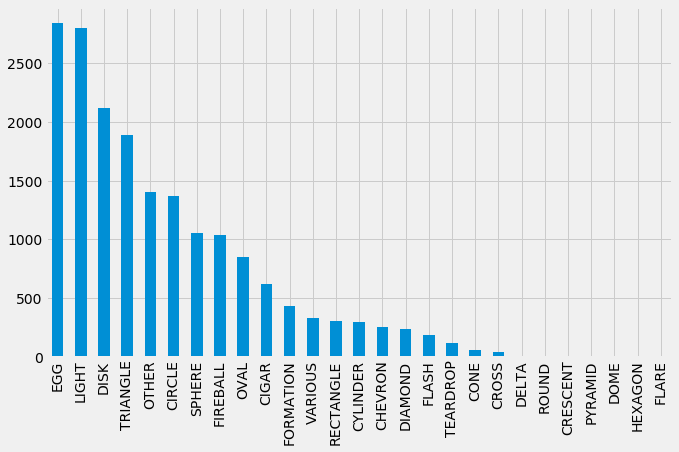

In [23]:
rcParams['figure.figsize'] = (10, 6)
plt.style.use('fivethirtyeight')
ufo.Shape_Reported.value_counts().plot(kind = 'bar');